In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
W = np.zeros(9)    
W[0] = 4./9.
W[1:5] = 1./9.
W[5:] = 1./36.

e = np.ndarray((2,9),dtype='int')
e[0] = ( 0, 1, 0, -1, 0, 1, -1, -1, 1)
e[1] = ( 0, 0, 1, 0, -1, 1, 1, -1, -1)
e = e.T

e_opp = [0, 3, 4, 1, 2,  7 , 8, 5 , 6]

N = 20



In [59]:
f = np.ones((N,N,9))

for i in range(9):
    f[:,:,i] = W[i]


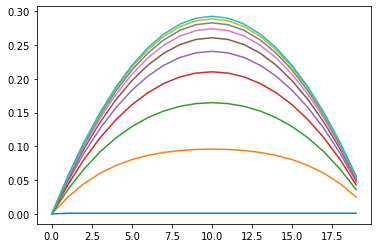

In [60]:
tmax = 1000
for t in range(tmax):
    for i in range(9):
        f[:,:,i] = np.roll(np.roll(f[:,:,i],shift=e[i][1],axis=0),shift=e[i][0],axis=1)

    rho = np.sum(f,axis=2)
    UX = np.zeros_like(rho)
    UY = np.zeros_like(rho)
    for i in range(9):
        UX += f[:,:,i]*e[i][0]
        UY += f[:,:,i]*e[i][1]

    UX /= rho
    UY /= rho

    UY[:,:] += 0.001
    UX[:,0] = 0
    UY[:,0] = 0
    rho[:,0] = 1
    
    
    
    for i in range(9):
        cu  = 3. * ( UX * e[i,0] + UY * e[i,1])
        f[:,:,i]= W[i] * rho[:,:] * (1. + cu[:,:] + 0.5*cu[:,:]*cu[:,:] - (3./2.) * ( UX**2 + UY**2 ) )


    if np.mod(t,int(tmax/10)) == 0:
        Umag = np.sqrt(UX*UX + UY*UY)
        #plt.figure()
        #plt.imshow(Umag)
        plt.plot(Umag[0,:])

In [17]:
iy0n = list()
ix0n = list()
ix00,iy00 = np.meshgrid(np.arange(N), np.arange(N), indexing='ij')

for i in range(0,9):
    ixt = np.roll(np.roll(ix00[:,:],shift=e[i][1],axis=0),shift=e[i][0],axis=1)
    iyt = np.roll(np.roll(iy00[:,:],shift=e[i][1],axis=0),shift=e[i][0],axis=1)
    ix0n.append(ixt)
    iy0n.append(iyt)
    
ix0= np.array(ix0n)
iy0= np.array(iy0n)


def Feq(_i, _rho, _U, fout):
        cu  = 3. * ( _U[:,:,0] * e[_i,0] + _U[:,:,1] * e[_i,1])
        fout[:,:] = W[_i] * _rho[:,:] * (1. + cu[:,:] + 0.5*cu[:,:]*cu[:,:] - (3./2.) * ( _U[:,:,0]**2 + _U[:,:,1]**2 ) )

G = 0.0001
U = np.zeros((N,N,2))
Rho = np.ones((N,N))
 
Mask = np.zeros_like(Rho)
for x0,y0 in 1-2*np.random.random(size=(5,2)):
   x,y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))
   r = np.sqrt((x-x0)**2 + (y-y0)**2)
   Mask = Mask + (r < 0.2)

#Mask[0,:] = 1
#Mask[-1,:] = 1

Mask = Mask > 0

for k in range(2000):
    U_next = np.zeros_like(U)
    Rho_next = np.zeros_like(Rho)

    
    for i in range(9):
        tmp_f = np.zeros_like(Rho)
        U_tmp = U[ix0[i],iy0[i]]
        Rho_tmp = Rho[ix0[i],iy0[i]]
        
        U_tmp[:,:,0] = U_tmp[:,:,0] + G/Rho_tmp/2. 
          
        Feq(i, Rho_tmp, U_tmp, tmp_f)

        U_next[:,:,0] = U_next[:,:,0] + e[i,0] * tmp_f
        U_next[:,:,1] = U_next[:,:,1] + e[i,1] * tmp_f

        Rho_next = Rho_next + tmp_f

    U_next[Mask,0] = 0
    U_next[Mask,1] = 0
    Rho_next[Mask] = 1

    U[:,:,:] = U_next[:,:,:] 
    U[:,:,0] = U[:,:,0] / Rho_next[:,:]
    U[:,:,1] = U[:,:,1] / Rho_next[:,:]
    
    U[:,:,0] = U[:,:,0] + 0.5*G/Rho

    Rho = Rho_next[:,:]


plt.imshow(Rho_next[:,:])
    
#(Rho - 1)/3

KeyboardInterrupt: 

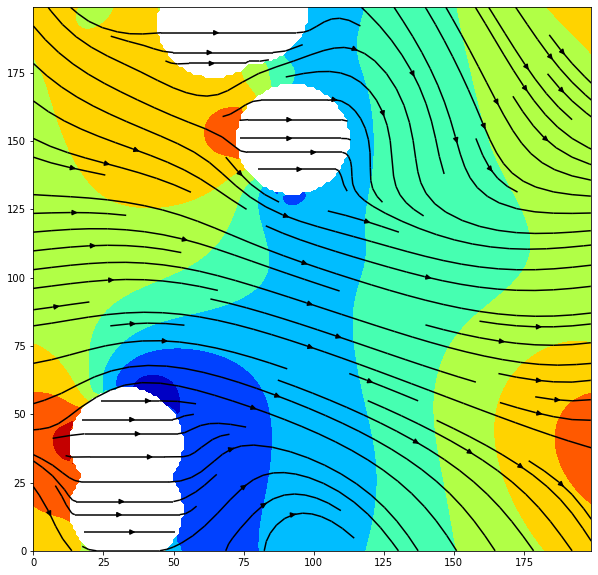

In [9]:
X,Y = np.meshgrid(np.arange(N),np.arange(N))
plt.figure(figsize=(10,10))
tmpX = U[:,:,0]
tmpY = U[:,:,1]
#tmpX[Mask] = np.nan
#tmpY[Mask] = np.nan
plt.streamplot(X,Y,tmpX,tmpY,color='k')
tmp = Rho
tmp[Mask] = np.nan
plt.contourf(X,Y,tmp,cmap='jet')